In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
import numpy as np 
# import pandas as pd 
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

In [3]:
IMAGE_SIZE=32
CHANNELS=3

In [4]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU detected: {gpus[0].name}")
    try:
        for gpu in gpus:
            # Allow TensorFlow to grow GPU memory as needed
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print("🚀 GPU memory growth enabled")
    except RuntimeError as e:
        print(e)
else:
    print("⚠️ No GPU detected. Running on CPU.")

✅ GPU detected: /physical_device:GPU:0
🚀 GPU memory growth enabled


In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 18345 images belonging to 10 classes.


In [6]:
train_generator.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [7]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [8]:
for image_batch, label_batch in train_generator:
    print(label_batch)
    print(image_batch[0])
    break

[3. 1. 4. 6. 1. 1. 7. 4. 2. 2. 5. 9. 7. 2. 5. 7. 5. 4. 8. 1. 7. 0. 4. 3.
 1. 7. 0. 8. 7. 0. 2. 1.]
[[[0.47120407 0.47512564 0.55482095]
  [0.4878951  0.49181667 0.570248  ]
  [0.5058824  0.50195616 0.58300346]
  ...
  [0.34390798 0.3251815  0.40704918]
  [0.3148982  0.29529035 0.38156486]
  [0.31651273 0.2969049  0.3831794 ]]

 [[0.4776622  0.48158377 0.56168276]
  [0.48224422 0.4861658  0.5645972 ]
  [0.5058824  0.50316703 0.5838107 ]
  ...
  [0.26752928 0.25125283 0.31557167]
  [0.3483662  0.32875836 0.41503286]
  [0.35320982 0.33360198 0.4198765 ]]

 [[0.53012276 0.5340443  0.61454695]
  [0.51250273 0.5164243  0.59485567]
  [0.57721543 0.57571095 0.655951  ]
  ...
  [0.13654162 0.1277945  0.14153798]
  [0.2911969  0.2738014  0.3445898 ]
  [0.27706975 0.2600778  0.32804078]]

 ...

 [[0.6745005  0.69411767 0.801301  ]
  [0.67692226 0.69411767 0.8029156 ]
  [0.6630622  0.67969227 0.7567565 ]
  ...
  [0.4750325  0.4771454  0.57971466]
  [0.46537584 0.4692974  0.5791013 ]
  [0.4667197  

In [9]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'valid',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 4585 images belonging to 10 classes.


In [10]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 50 images belonging to 10 classes.


In [11]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    
    layers.BatchNormalization(input_shape=input_shape),
    
    layers.Conv2D(32, kernel_size = (5,5), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.BatchNormalization(),
    layers.Conv2D(64,  kernel_size = (3,3),padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.BatchNormalization(),
    layers.Conv2D(64,  kernel_size = (3,3),padding='same',activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    
    layers.Dropout(0.33),
    layers.BatchNormalization(),
    layers.Dense(n_classes, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 32, 32, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                        

In [13]:
#### Early stopping for preventing Overfitting
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=3,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    # start_from_epoch=0,
)

In [14]:
model_history=model.fit(train_generator,
                        validation_data=validation_generator,batch_size=32,
                        epochs=150,callbacks=early_stopping)

Epoch 1/150
574/574 [==============================] - 81s 135ms/step - loss: 0.9950 - accuracy: 0.6638 - val_loss: 0.5535 - val_accuracy: 0.8137
Epoch 2/150
574/574 [==============================] - 86s 150ms/step - loss: 0.6110 - accuracy: 0.7920 - val_loss: 0.3742 - val_accuracy: 0.8735
Epoch 3/150
574/574 [==============================] - 89s 155ms/step - loss: 0.4948 - accuracy: 0.8317 - val_loss: 0.3284 - val_accuracy: 0.8853
Epoch 4/150
574/574 [==============================] - 26s 45ms/step - loss: 0.4203 - accuracy: 0.8558 - val_loss: 0.3447 - val_accuracy: 0.8851
Epoch 5/150
574/574 [==============================] - 84s 147ms/step - loss: 0.3881 - accuracy: 0.8648 - val_loss: 0.2192 - val_accuracy: 0.9269
Epoch 6/150
574/574 [==============================] - 49s 85ms/step - loss: 0.3476 - accuracy: 0.8821 - val_loss: 0.2934 - val_accuracy: 0.9014
Epoch 7/150
574/574 [==============================] - 22s 39ms/step - loss: 0.3149 - accuracy: 0.8913 - val_loss: 0.2592 - va

In [15]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

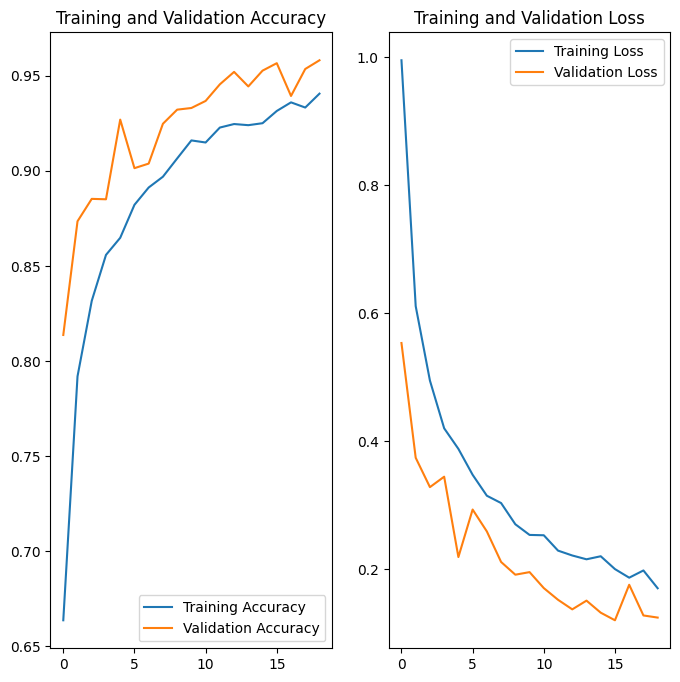

In [16]:
EPOCH=19
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
model.evaluate(test_generator)

2/2 [==============================] - 0s 281ms/step - loss: 0.1807 - accuracy: 0.9400


[0.18069137632846832, 0.9399999976158142]

Our model accuracy on the training dataset is 94%.

In [19]:
test_labels=[]
test_image=[]
for image_batch, label_batch in test_generator:
    test_labels.append(label_batch)
    test_image.append(image_batch)
    break

In [20]:
predictions = model.predict(test_image)
predicted_label = [class_names[np.argmax(element)] for element in predictions]

actual_test_label = []
for element in test_labels:
    for i in range(len(predictions)):
         actual_test_label.append(class_names[int(element[i])])    

1/1 [==============================] - 0s 101ms/step


In [21]:
import pandas as pd

In [22]:
results=pd.DataFrame({"Actual":actual_test_label,
                      "Predictions":predicted_label})
results

,Actual,Predictions
0,Tomato___Bacterial_spot,Tomato___Bacterial_spot
1,Tomato___Septoria_leaf_spot,Tomato___Septoria_leaf_spot
2,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus
3,Tomato___Tomato_mosaic_virus,Tomato___Tomato_mosaic_virus
4,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus
5,Tomato___healthy,Tomato___healthy
6,Tomato___healthy,Tomato___healthy
7,Tomato___Target_Spot,Tomato___Target_Spot
8,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus
9,Tomato___healthy,Tomato___healthy


In [23]:
##Saving the model
import os
model.save("./Tomato_model_v2.h5")